# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [33]:
data = pd.read_csv("weight-height.csv")
male_df =  data.loc[data['Gender']=='Male']
female_df =  data.loc[data['Gender']=='Female']

# print(male_df.describe())
print("Male Height mean is:", male_df.Height.mean())
print("Male Height STD is:", male_df.Height.std())
print("Male Weight mean is:", male_df.Weight.mean())
print("Male Weight STD is", male_df.Weight.std())   
print(" ")
print("Female Height mean is:", female_df.Height.mean())
print("Female Height std is:", female_df.Height.std())
print("Female Weight mean is:", female_df.Weight.mean())
print("Female Weight mean is:", female_df.Weight.std())


  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean is: 69.02634590621741
Male Height STD is: 2.863362228660647
Male Weight mean is: 187.0206206581932
Male Weight STD is 19.7811545167638
 
Female Height mean is: 63.70877360342507
Female Height std is: 2.696284015765054
Female Weight mean is: 135.86009300746835
Female Weight mean is: 19.022467805319028


#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

<function matplotlib.pyplot.show(*args, **kw)>

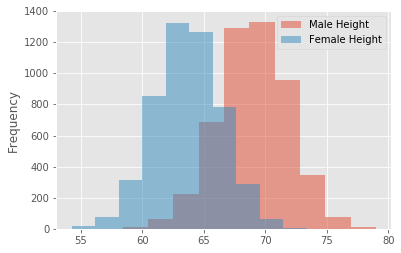

In [45]:
binsize = 10
male_df.Height.plot.hist(bins = binsize, label = "Male Height", alpha = 0.5)
female_df.Height.plot.hist(bins = binsize, label = "Female Height", alpha = 0.5)
plt.legend()
plt.show

In [ ]:
# Record your observations - are these inline with your personal observations?



<function matplotlib.pyplot.show(*args, **kw)>

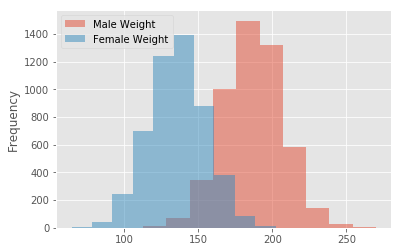

In [48]:
binsize = 10
male_df.Weight.plot.hist(bins = binsize, label = "Male Weight", alpha = 0.5)
female_df.Weight.plot.hist(bins = binsize, label = "Female Weight", alpha = 0.5)
plt.legend()
plt.show

#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density function

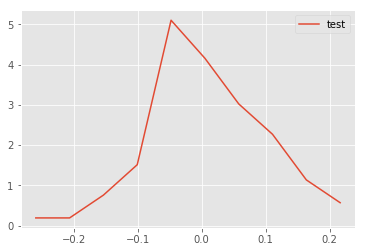

In [49]:
def density(x):
    
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays with zeros to store interpolated values
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]

    # plot the calculated curve
    return pdfx, pdfy



# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

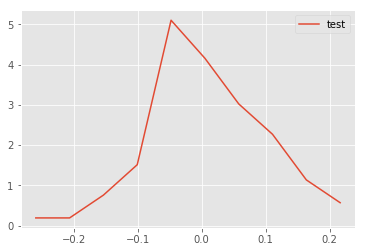

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

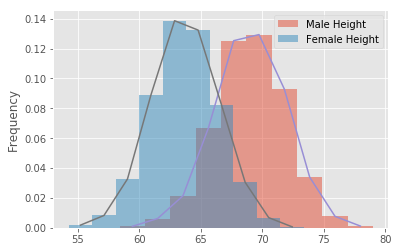

In [67]:
# male_df.Height.plot.hist(bins=10, alpha=0.5, label="Male Height");
# female_df.Height.plot.hist(bins=10, alpha=0.5, label="Female Height");
# plt.legend()
# x,y = density(male_df.Height)
# plt.plot(x,y)
# plt.show()

male_df.Height.plot.hist(bins = binsize, density = True,  alpha = 0.5, label ="Male Height");
female_df.Height.plot.hist(bins = binsize, density = True, alpha = 0.5, label = 'Female Height');
plt.legend()
x,y = density(male_df.Height)
plt.plot(x,y)
x,y = density(female_df.Height)
plt.plot(x,y)
plt.show()


In [56]:
density(female_df.Height)

(array([55.21945595, 57.13210121, 59.04474646, 60.95739171, 62.87003697,
        64.78268222, 66.69532748, 68.60797273, 70.52061798, 72.43326324]),
 array([0.00177764, 0.00826081, 0.03272954, 0.08919584, 0.13865614,
        0.1323821 , 0.0819807 , 0.03042906, 0.00679687, 0.0006274 ]))

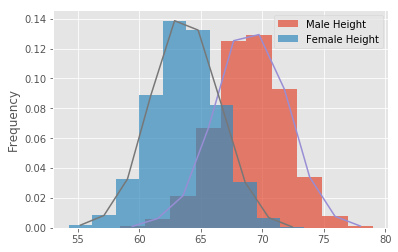

#### Repeat above exerice for male and female weights

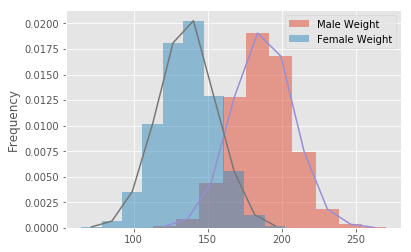

In [68]:
male_df.Weight.plot.hist(bins = binsize, density = True,  alpha = 0.5, label ="Male Weight");
female_df.Weight.plot.hist(bins = binsize, density = True, alpha = 0.5, label = 'Female Weight');
plt.legend()
x,y = density(male_df.Weight)
plt.plot(x,y)
x,y = density(female_df.Weight)
plt.plot(x,y)
plt.show()


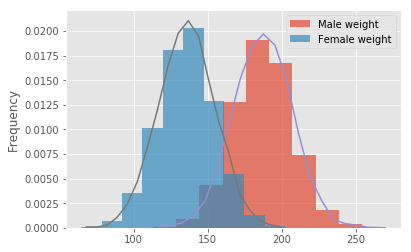

#### Write your observations in the cell below.

In [68]:
# Record your observations - are these inline with your personal observations?


# So whats the takeaway when comparing male and female heights and weights 



#### Repeat Above experiments in seaborn and compare with your results. 

Text(0.5,1,'Comparing weights')

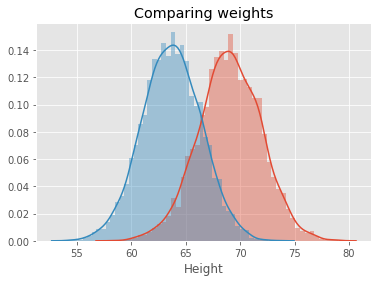

In [13]:
import seaborn as sns
sns.distplot(male_df.Height)
sns.distplot(female_df.Height)
plt.title('Comparing Heights')
plt.show()

Text(0.5,1,'Comparing Weights')

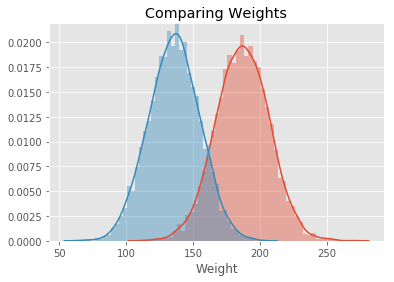

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.